<p></p>
<p style="font-size:35px;text-align:center;color:blue">Complexity and learning curve analysis for classification</p>
<p style="font-size:25px;text-align:center;color:red">(Using Synthetic data set)</p>
<p style="font-size:20px;text-align:center">Dr. Tirthajyoti Sarkar, Sunnyvale, CA</p>

## Synthetic data set from scikit-learn
<p style="font-size:16px;font-family:cambria">
Now we turn to the 2nd dataset for this assignment. In the loan data dataset, we did not observe a markedly improved performance with Boosting algorithm over the single decision tree. Therefore, we choose to use a synthetic dataset to clearly demonstrate this advantage. We use <mark><span style="font-family:consolas">datasets.make_hastie_10_2</span></mark> method from scikit-learn to generate <b>12,000 samples with 10 feature variables and a binary class variable</b>.
<p style="font-size:16px;font-family:cambria">
Apart from pairwise scatter plots, to illustrate the class separation, we show boxplots grouped by response classes. It is clear from these plots that there is lot of overlap between classes for every individual feature. Therefore, it is be expected that a single feature or a single decision tree may not be an effective classifier but an ensemble meta-learner could prove to be effective.
</p>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
from sklearn import datasets

## Make the dataset and basic operations

In [3]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

In [4]:
df=pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,11)])
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,-2.301539,1.744812,-0.761207,0.319039,-0.249370
1,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-1.099891,-0.172428,-0.877858,0.042214,0.582815
2,-1.100619,1.144724,0.901591,0.502494,0.900856,-0.683728,-0.122890,-0.935769,-0.267888,0.530355
3,-0.691661,-0.396754,-0.687173,-0.845206,-0.671246,-0.012665,-1.117310,0.234416,1.659802,0.742044
4,-0.191836,-0.887629,-0.747158,1.692455,0.050808,-0.636996,0.190915,2.100255,0.120159,0.617203
5,0.300170,-0.352250,-1.142518,-0.349343,-0.208894,0.586623,0.838983,0.931102,0.285587,0.885141
6,-0.754398,1.252868,0.512930,-0.298093,0.488518,-0.075572,1.131629,1.519817,2.185575,-1.396496
7,-1.444114,-0.504466,0.160037,0.876169,0.315635,-2.022201,-0.306204,0.827975,0.230095,0.762011
8,-0.222328,-0.200758,0.186561,0.410052,0.198300,0.119009,-0.670662,0.377564,0.121821,1.129484
9,1.198918,0.185156,-0.375285,-0.638730,0.423494,0.077340,-0.343854,0.043597,-0.620001,0.698032


In [5]:
df['y']=pd.Series(y)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,-2.301539,1.744812,-0.761207,0.319039,-0.249370,1.0
1,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-1.099891,-0.172428,-0.877858,0.042214,0.582815,1.0
2,-1.100619,1.144724,0.901591,0.502494,0.900856,-0.683728,-0.122890,-0.935769,-0.267888,0.530355,-1.0
3,-0.691661,-0.396754,-0.687173,-0.845206,-0.671246,-0.012665,-1.117310,0.234416,1.659802,0.742044,-1.0
4,-0.191836,-0.887629,-0.747158,1.692455,0.050808,-0.636996,0.190915,2.100255,0.120159,0.617203,1.0


## Basic visualizations
<p style="font-size:16px;font-family:cambria">
We plot histograms, boxlots and scatterplots of the dataset and observe that <b>the class separation is not very obvious</b>. Particularly, boxplots show lot of overlap between features for two output classes. 
<br><br>
So, <b>this should be a non-trivial classification task</b>.</p>

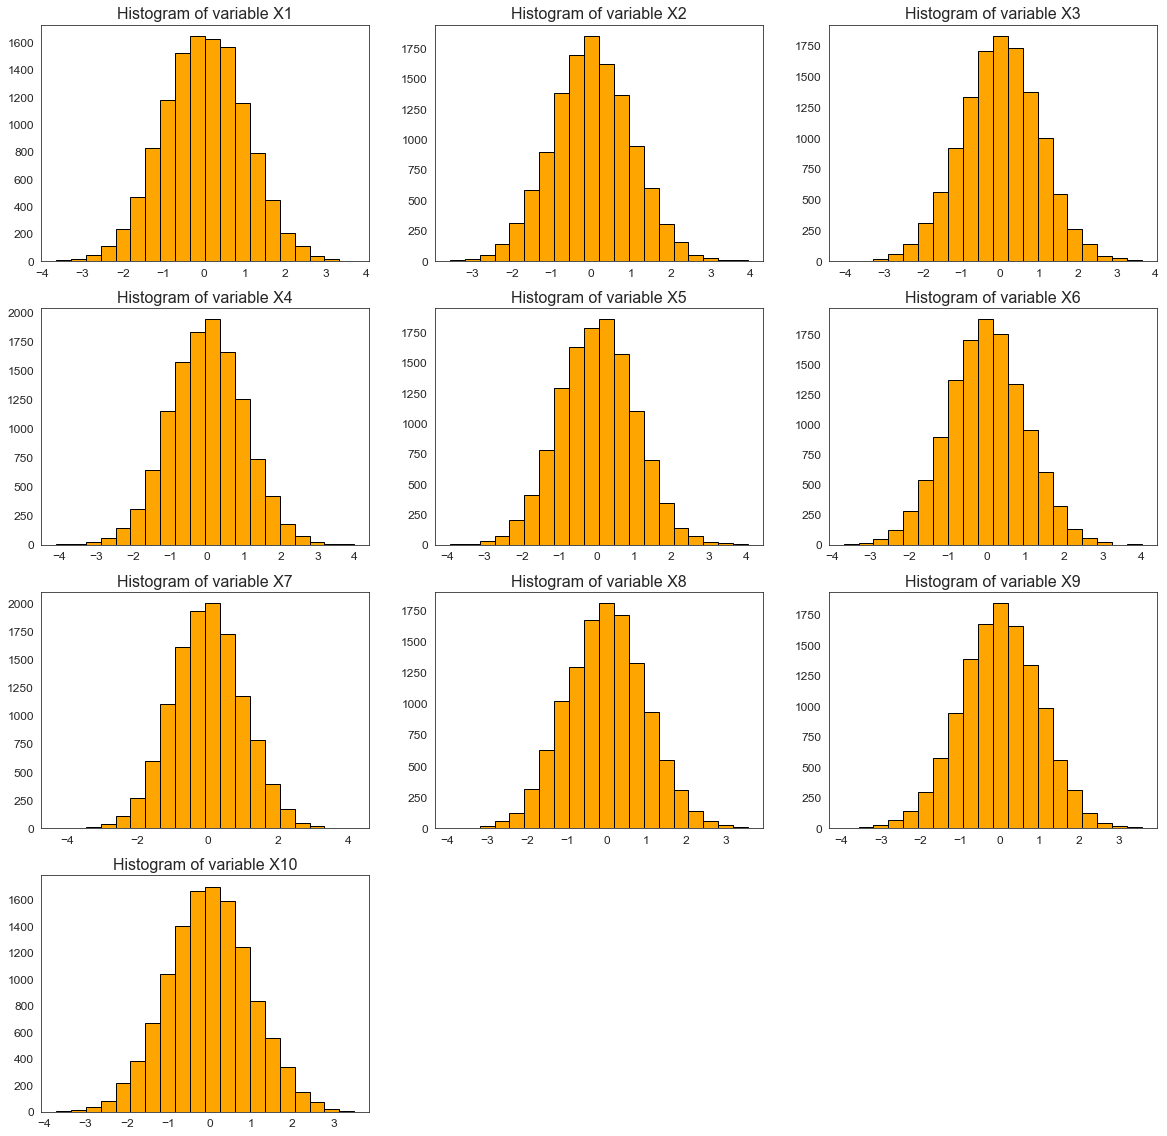

In [6]:
i=1
plt.figure(figsize=(20,20))
for c in df.columns[:-1]:
    plt.subplot(4,3,i)
    plt.title(f"Histogram of variable {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show()

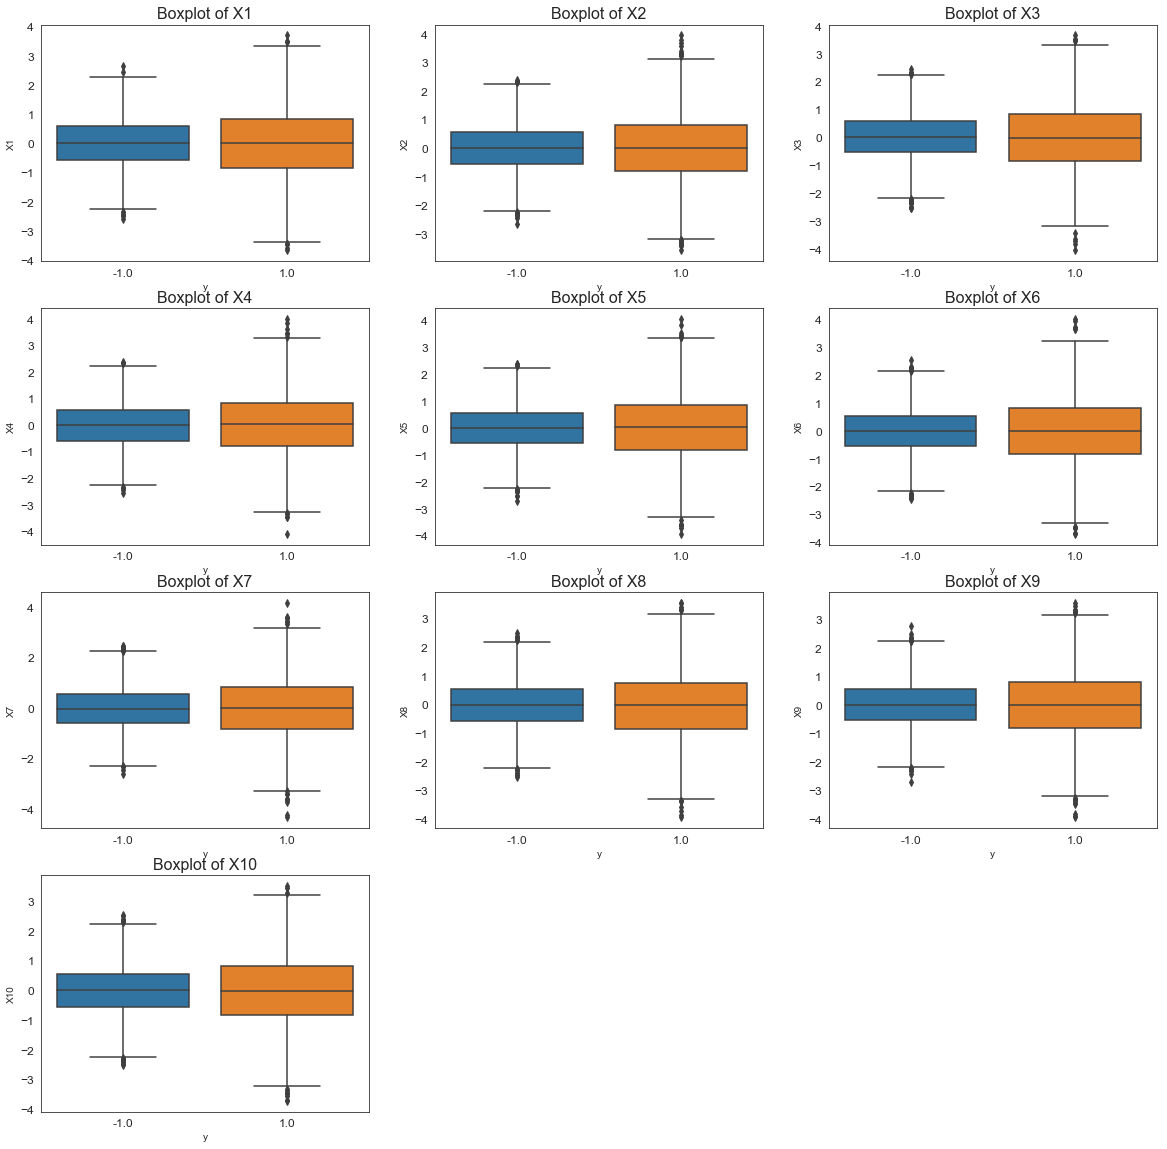

In [7]:
i=1
plt.figure(figsize=(20,20))
for c in df.columns[:-1]:
    plt.subplot(4,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['y'])
    i+=1
plt.show()

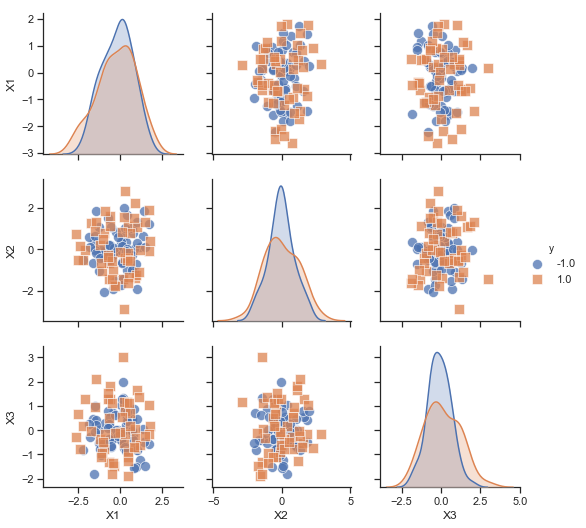

In [8]:
df_sample=df.sample(frac=0.01)
sns.set(style="ticks")
g=sns.pairplot(df_sample,vars=["X1","X2","X3"],
               hue="y",markers=["o", "s"],
               diag_kind="kde",diag_kws=dict(shade=True),plot_kws=dict(s=100,alpha=0.75))

## Test/train/validation split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop('y',axis=1)
y=df['y']

### First divide train and test data in 70:30 ratio

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Then further divide the test set in 50:50 ratio into validation set and test set

In [12]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)

In [13]:
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
2938,-0.893378,0.715271,-0.830787,0.109496,-0.615330,-0.147522,-1.734896,1.536638,-0.411030,-0.879309
3692,-1.910407,1.318967,1.212181,-1.212155,-1.652176,-0.851461,-0.516466,0.519418,-0.919118,-0.106994
11354,-0.146355,0.130499,0.703170,-0.432753,-1.722938,-1.403732,0.769506,-2.397202,1.791123,1.400588
7404,1.406187,1.459237,1.167824,0.001310,-0.774577,0.170356,-0.122232,0.461223,-0.342589,1.197409
560,1.709701,-1.555526,0.591374,0.361203,1.347986,-0.977064,-1.069969,-0.698524,-0.837309,-0.301494


In [14]:
X_val.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
11888,1.129188,-1.099598,1.382877,2.266343,0.561052,-0.380079,1.320172,0.003798,-0.356200,0.443150
2523,0.543023,-0.367512,0.876252,-0.822763,-0.115932,0.216833,-1.102785,-2.054046,-0.637284,-0.150670
1377,-0.668801,-0.552200,-0.308263,-0.905333,0.628254,-0.499454,-1.439082,1.608757,0.307537,0.202533
9577,-0.867967,0.788344,0.929177,-0.333772,-0.850700,2.217406,0.479636,1.387929,-0.346564,-0.294202
4772,-0.658256,-0.132016,-0.181239,0.425026,1.569808,-0.172350,-0.657245,0.524432,0.484684,-0.515902


### Show the shape of these sets

In [15]:
print("Shape of validation set:", X_val.shape)
print("Shape of test set:", X_test.shape)
print("Shape of training set:", X_train.shape)

Shape of validation set: (1800, 10)
Shape of test set: (1800, 10)
Shape of training set: (8400, 10)


## Decision Tree model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5)

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions and evaluation

In [19]:
predictions = dtree.predict(X_val)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [21]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.7088888888888889


### Varying hyperparameters

#### Varying *`max_depth`*

In [22]:
val_acc_max_depth=[]
val_f1_max_depth=[]
train_acc_max_depth=[]
train_f1_max_depth=[]
val_range=(1,81,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_leaf=1)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_max_depth.append(acc_train)
    train_f1_max_depth.append(f1_train)
    val_acc_max_depth.append(acc_val)
    val_f1_max_depth.append(f1_val)

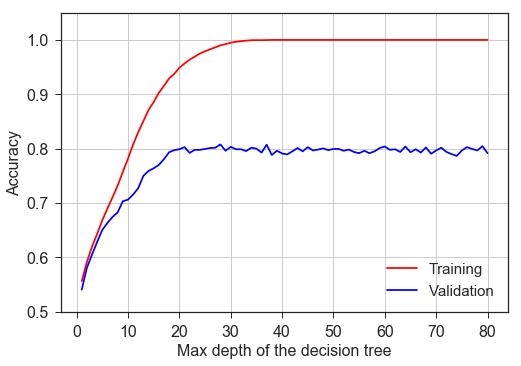

In [23]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_max_depth,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_max_depth,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Max depth of the decision tree", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.5,1.05)
plt.show()

#### Varying *`min_samples_leaf`* with *`max_depth`* = 20

In [24]:
val_acc_min_samples_leaf=[]
val_f1_min_samples_leaf=[]
train_acc_min_samples_leaf=[]
train_f1_min_samples_leaf=[]
val_range=(1,41,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=i)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_min_samples_leaf.append(acc_train)
    train_f1_min_samples_leaf.append(f1_train)
    val_acc_min_samples_leaf.append(acc_val)
    val_f1_min_samples_leaf.append(f1_val)

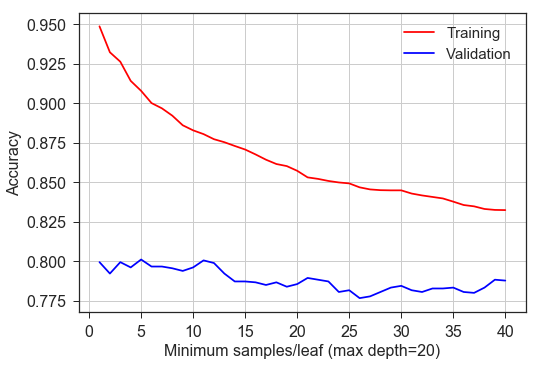

In [25]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_min_samples_leaf,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_min_samples_leaf,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Minimum samples/leaf (max depth=20)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.7,1.0)
plt.show()

### LEARNING CURVE: Varying training set size

In [26]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=5)
    # Sampling
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    # Fitting and Predictions
    dtree.fit(X_train_sampled,y_train_sampled)
    pred_train = dtree.predict(X_train_sampled)
    pred_val = dtree.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


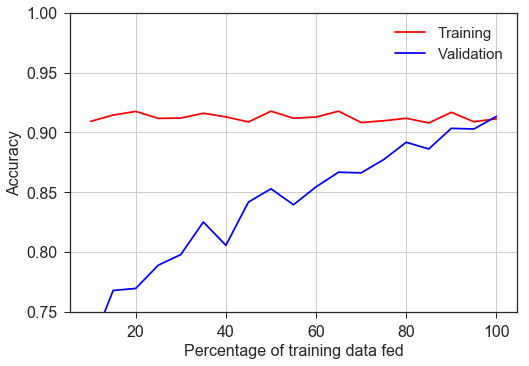

In [27]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.75,1.0)
plt.show()

## Boosting algorithm model
<p style="font-size:16px;font-family:cambria">
    We use the same <span style="font-family:consolas"><mark>AdaBoost</mark></span> classifier and observe markedly improved accuracy with the ensemble learner. We note that individual tree showed accuracy of about 70%, which can easily be classified as a ‘weak learner’. To drive this point home, we set the <span style="font-family:consolas"><mark>max_depth</mark></span> to only 2 and <span style="font-family:consolas"><mark>min_sample_leaf</mark></span> to 20 for the individual trees in the meta-learner i.e. <b>make the pruning aggressive</b>.

In [28]:
from sklearn.ensemble import AdaBoostClassifier

c:\users\tirtha\python\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=2,max_depth=3),
                            n_estimators=20,learning_rate=0.01)

In [30]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=20, random_state=None)

### Predictions and evaluation

In [31]:
predictions = adaboost.predict(X_val)

In [32]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.7422222222222222


### Varying number of estimators

In [33]:
import time
val_acc_num_trees=[]
val_f1_num_trees=[]
train_acc_num_trees=[]
train_f1_num_trees=[]
time_adaboost=[]
val_range=(1,152,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    # Fitting
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=2),
                            n_estimators=i,learning_rate=0.2)
    adaboost.fit(X_train,y_train)
    pred_train = adaboost.predict(X_train)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_num_trees.append(acc_train)
    train_f1_num_trees.append(f1_train)
    val_acc_num_trees.append(acc_val)
    val_f1_num_trees.append(f1_val)
    t2=time.time()
    time_adaboost.append(t2-t1)
    print(f"Done for number of trees: {i}")

Done for number of trees: 1
Done for number of trees: 6
Done for number of trees: 11
Done for number of trees: 16
Done for number of trees: 21
Done for number of trees: 26
Done for number of trees: 31
Done for number of trees: 36
Done for number of trees: 41
Done for number of trees: 46
Done for number of trees: 51
Done for number of trees: 56
Done for number of trees: 61
Done for number of trees: 66
Done for number of trees: 71
Done for number of trees: 76
Done for number of trees: 81
Done for number of trees: 86
Done for number of trees: 91
Done for number of trees: 96
Done for number of trees: 101
Done for number of trees: 106
Done for number of trees: 111
Done for number of trees: 116
Done for number of trees: 121
Done for number of trees: 126
Done for number of trees: 131
Done for number of trees: 136
Done for number of trees: 141
Done for number of trees: 146
Done for number of trees: 151


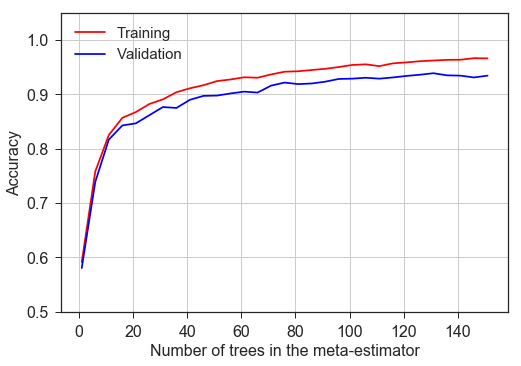

In [34]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_num_trees,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_num_trees,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of trees in the meta-estimator", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.5,1.05)
plt.show()

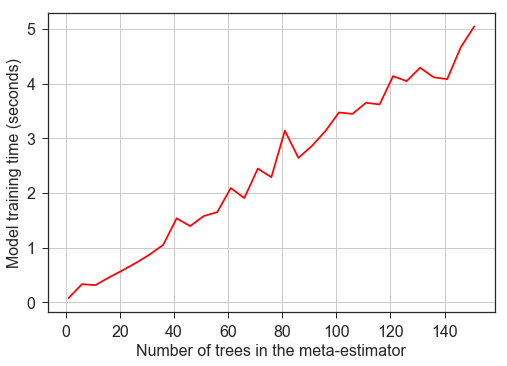

In [35]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),time_adaboost,c='red')
#plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_num_trees,c='blue')
#plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of trees in the meta-estimator", fontsize=16)
plt.ylabel("Model training time (seconds)",fontsize=16)
#plt.ylim(0.7,1.05)
plt.show()

### Tweaking the `learning_rate` of `AdaBoostClassifier`

In [36]:
val_acc_lr=[]
val_f1_lr=[]
train_acc_lr=[]
train_f1_lr=[]
val_range=(1,21,1)
lr_range=[]
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    lr=0.1*i
    lr_range.append(lr)
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=2),
                            n_estimators=100,learning_rate=lr)
    adaboost.fit(X_train,y_train)
    pred_train = adaboost.predict(X_train)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_lr.append(acc_train)
    train_f1_lr.append(f1_train)
    val_acc_lr.append(acc_val)
    val_f1_lr.append(f1_val)
    print(f"Done for learning rate: {lr}")

Done for learning rate: 0.1
Done for learning rate: 0.2
Done for learning rate: 0.30000000000000004
Done for learning rate: 0.4
Done for learning rate: 0.5
Done for learning rate: 0.6000000000000001
Done for learning rate: 0.7000000000000001
Done for learning rate: 0.8
Done for learning rate: 0.9
Done for learning rate: 1.0
Done for learning rate: 1.1
Done for learning rate: 1.2000000000000002
Done for learning rate: 1.3
Done for learning rate: 1.4000000000000001
Done for learning rate: 1.5
Done for learning rate: 1.6
Done for learning rate: 1.7000000000000002
Done for learning rate: 1.8
Done for learning rate: 1.9000000000000001
Done for learning rate: 2.0


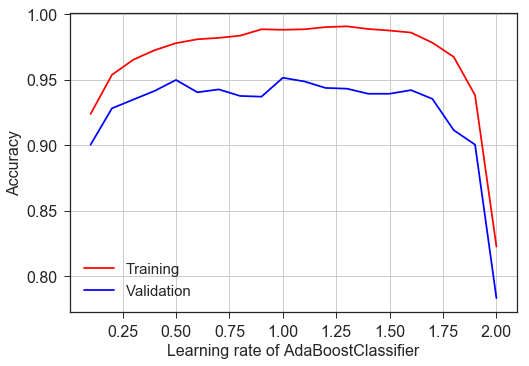

In [37]:
plt.plot(lr_range,train_acc_lr,c='red')
plt.plot(lr_range,val_acc_lr,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Learning rate of AdaBoostClassifier", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.7,1.05)
plt.show()

### LEARNING CURVE: Varying training set size

In [38]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Model
    percentage=i*0.01
    adaboost = adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=20),
                            n_estimators=20,learning_rate=0.5)
    # Sampling
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    # Fitting and prediction
    adaboost.fit(X_train_sampled,y_train_sampled)
    pred_train = adaboost.predict(X_train_sampled)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


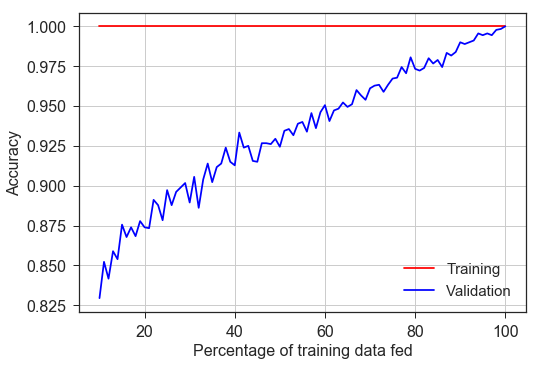

In [39]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.75,1.0)
plt.show()

## SVM model

### Scaling the data using `StandardScaler`

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
X_train_scaled=StandardScaler().fit_transform(X_train)
X_val_scaled=StandardScaler().fit_transform(X_val)

In [25]:
from sklearn.svm import SVC

In [43]:
svc_clf=SVC(kernel="poly", C=1,degree=2)

In [44]:
svc_clf.fit(X_train_scaled,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predictions and evaluation

In [45]:
predictions=svc_clf.predict(X_val_scaled)

In [46]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.9788888888888889


### Varying degree of polynomial kernel

In [47]:
val_acc_degree=[]
val_f1_degree=[]
train_acc_degree=[]
train_f1_degree=[]
val_range=(1,11,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    svc_clf=SVC(kernel="poly", C=0.01,degree=i)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_degree.append(acc_train)
    train_f1_degree.append(f1_train)
    val_acc_degree.append(acc_val)
    val_f1_degree.append(f1_val)
    print(f"Done for number of degree: {i}")

Done for number of degree: 1
Done for number of degree: 2
Done for number of degree: 3
Done for number of degree: 4
Done for number of degree: 5
Done for number of degree: 6
Done for number of degree: 7
Done for number of degree: 8
Done for number of degree: 9
Done for number of degree: 10


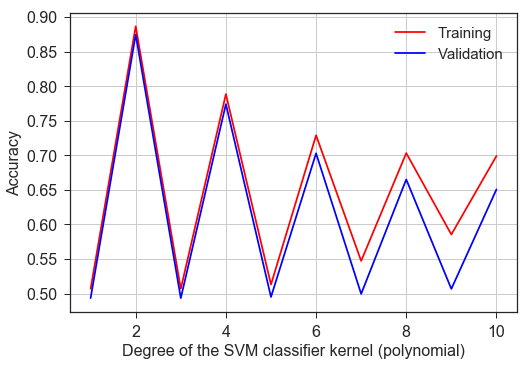

In [48]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_degree,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_degree,c='blue')
plt.grid(True)
plt.legend(["Training","Validation"],fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Degree of the SVM classifier kernel (polynomial)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.show()

#### But what if we put a penalty for misclassification? `C` = 10

In [49]:
val_acc_degree=[]
val_f1_degree=[]
train_acc_degree=[]
train_f1_degree=[]
val_range=(1,11,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    svc_clf=SVC(kernel="poly", C=10,degree=i)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_degree.append(acc_train)
    train_f1_degree.append(f1_train)
    val_acc_degree.append(acc_val)
    val_f1_degree.append(f1_val)
    print(f"Done for number of degree: {i}")

Done for number of degree: 1
Done for number of degree: 2
Done for number of degree: 3
Done for number of degree: 4
Done for number of degree: 5
Done for number of degree: 6
Done for number of degree: 7
Done for number of degree: 8
Done for number of degree: 9
Done for number of degree: 10


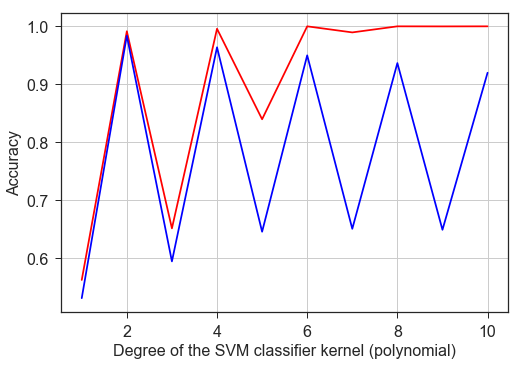

In [50]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_degree,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_degree,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Degree of the SVM classifier kernel (polynomial)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.show()

### Varying regularization parameter _C_ (i.e. $\frac{1}{\lambda}$ in the Lagrangian formulation of SVM)

In [51]:
val_acc_C=[]
val_f1_C=[]
train_acc_C=[]
train_f1_C=[]
C_range=[]
val_range=(-8,2,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    C=2**(i)
    C_range.append(C)
    # Fitting
    svc_clf=SVC(kernel="poly", C=C,degree=2)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_C.append(acc_train)
    train_f1_C.append(f1_train)
    val_acc_C.append(acc_val)
    val_f1_C.append(f1_val)
    print(f"Done for number of C: {2**(i)}")

Done for number of C: 0.00390625
Done for number of C: 0.0078125
Done for number of C: 0.015625
Done for number of C: 0.03125
Done for number of C: 0.0625
Done for number of C: 0.125
Done for number of C: 0.25
Done for number of C: 0.5
Done for number of C: 1
Done for number of C: 2


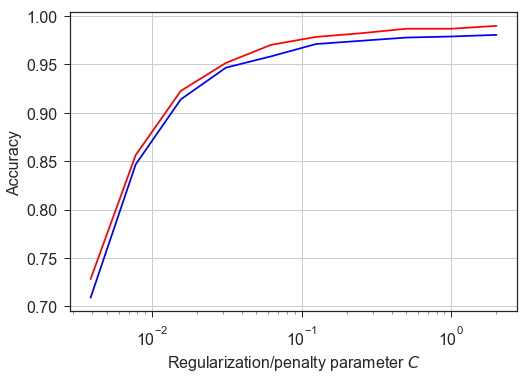

In [52]:
plt.semilogx(C_range,train_acc_C,c='red')
plt.semilogx(C_range,val_acc_C,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Regularization/penalty parameter $C$", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.81,0.85)
plt.show()

### Radial basis function (`RBF`) kernel - varying `gamma` 

In [53]:
val_acc_gamma=[]
val_f1_gamma=[]
train_acc_gamma=[]
train_f1_gamma=[]
gamma_range=[]
val_range=(-25,10,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    gamma=10**(i/5.0)
    gamma_range.append(gamma)
    # Fitting9
    svc_clf=SVC(kernel="rbf", C=1,gamma=gamma)
    svc_clf.fit(X_train_scaled,y_train)
    pred_train = svc_clf.predict(X_train_scaled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_gamma.append(acc_train)
    train_f1_gamma.append(f1_train)
    val_acc_gamma.append(acc_val)
    val_f1_gamma.append(f1_val)
    print(f"Done for gamma: {gamma}")

Done for gamma: 1e-05
Done for gamma: 1.584893192461114e-05
Done for gamma: 2.5118864315095822e-05
Done for gamma: 3.9810717055349695e-05
Done for gamma: 6.309573444801929e-05
Done for gamma: 0.0001
Done for gamma: 0.00015848931924611142
Done for gamma: 0.00025118864315095795
Done for gamma: 0.00039810717055349735
Done for gamma: 0.000630957344480193
Done for gamma: 0.001
Done for gamma: 0.001584893192461114
Done for gamma: 0.0025118864315095794
Done for gamma: 0.003981071705534973
Done for gamma: 0.00630957344480193
Done for gamma: 0.01
Done for gamma: 0.015848931924611134
Done for gamma: 0.025118864315095794
Done for gamma: 0.039810717055349734
Done for gamma: 0.06309573444801933
Done for gamma: 0.1
Done for gamma: 0.15848931924611134
Done for gamma: 0.251188643150958
Done for gamma: 0.3981071705534972
Done for gamma: 0.6309573444801932
Done for gamma: 1.0
Done for gamma: 1.5848931924611136
Done for gamma: 2.51188643150958
Done for gamma: 3.9810717055349722
Done for gamma: 6.30957344

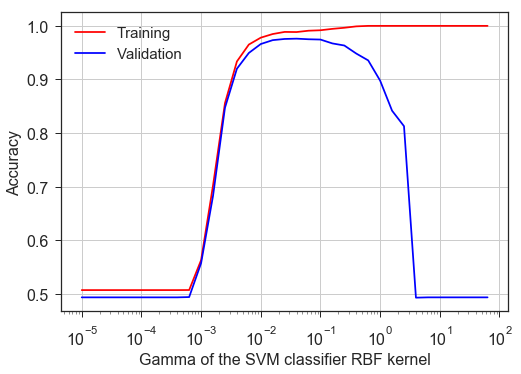

In [54]:
plt.semilogx(gamma_range,train_acc_gamma,c='red')
plt.semilogx(gamma_range,val_acc_gamma,c='blue')
plt.grid(True)
plt.legend(["Training","Validation"],fontsize=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Gamma of the SVM classifier RBF kernel", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.show()

### LEARNING CURVE: Varying training set size

In [55]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    svc_clf=SVC(kernel="rbf",C=1,gamma=0.01)
    # Sampling (and scaling)
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and prediction
    svc_clf.fit(X_train_sampled,y_train_sampled)
    pred_train = svc_clf.predict(X_train_sampled)
    pred_val = svc_clf.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 15% training set size
Done for: 20% training set size
Done for: 25% training set size
Done for: 30% training set size
Done for: 35% training set size
Done for: 40% training set size
Done for: 45% training set size
Done for: 50% training set size
Done for: 55% training set size
Done for: 60% training set size
Done for: 65% training set size
Done for: 70% training set size
Done for: 75% training set size
Done for: 80% training set size
Done for: 85% training set size
Done for: 90% training set size
Done for: 95% training set size
Done for: 100% training set size


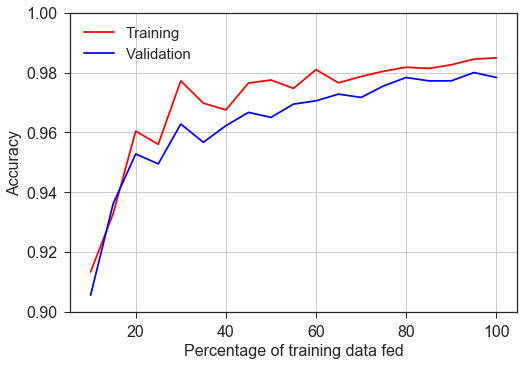

In [56]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.9,1.0)
plt.show()

## _K_-nearest neighbor model

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn=KNeighborsClassifier(3)

In [59]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [60]:
predictions=knn.predict(X_val_scaled)

In [61]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.7255555555555555


### Varying number of neighbors

In [62]:
val_acc_k=[]
val_f1_k=[]
train_acc_k=[]
train_f1_k=[]
val_range=(1,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    knn=KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    pred_train = knn.predict(X_train_scaled)
    pred_val = knn.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_k.append(acc_train)
    train_f1_k.append(f1_train)
    val_acc_k.append(acc_val)
    val_f1_k.append(f1_val)
    print(f"Done for number of neighbors: {i}")

Done for number of neighbors: 1
Done for number of neighbors: 2
Done for number of neighbors: 3
Done for number of neighbors: 4
Done for number of neighbors: 5
Done for number of neighbors: 6
Done for number of neighbors: 7
Done for number of neighbors: 8
Done for number of neighbors: 9
Done for number of neighbors: 10
Done for number of neighbors: 11
Done for number of neighbors: 12
Done for number of neighbors: 13
Done for number of neighbors: 14
Done for number of neighbors: 15
Done for number of neighbors: 16
Done for number of neighbors: 17
Done for number of neighbors: 18
Done for number of neighbors: 19
Done for number of neighbors: 20


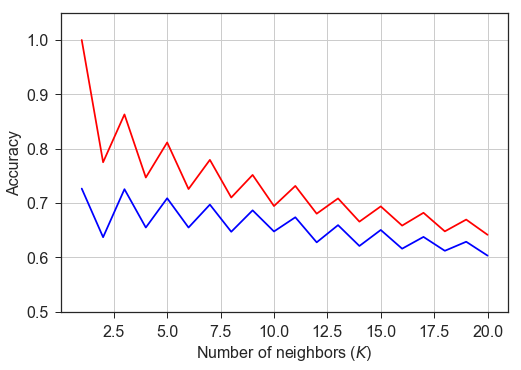

In [63]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_k,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_k,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neighbors ($K$)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.5,1.05)
plt.show()

### LEARNING CURVE: Varying training set size

In [64]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    knn=KNeighborsClassifier(10)
   # Sampling
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and prediction
    knn.fit(X_train_sampled,y_train_sampled)
    pred_train = knn.predict(X_train_sampled)
    pred_val = knn.predict(X_val_scaled)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


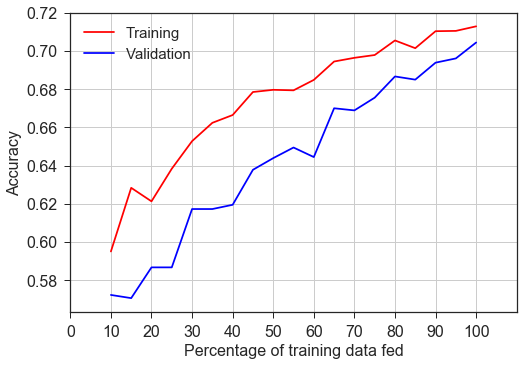

In [65]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.7,0.9)
plt.xlim(0,110)
plt.show()

## Neural Networks (Multi-layer perceptron)
<p style="font-size:16px;font-family:cambria">
MLP shows surprisingly poor performance for this dataset. We try many combinations of learning rate, architectures (layers and nodes), and optimizer choice but the accuracy never goes above 40-45%.

In [66]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

c:\users\tirtha\python\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [67]:
n_input=X_train_scaled.shape[0]
num_classes = len(y_train.unique())
input_dim=X_train_scaled.shape[1]

### Function to construct 2-hidden-layer Keras model

In [68]:
def make_NN_model(input_dim, num_classes, neuron_layer_1=20, neuron_layer_2=10, dropout_prob=0.25, \
                  activation_func='relu', learning_rate=0.01,optimizer='SGD'):
    """
    Creates a 2-hidden-layer Keras Neural Network model by adding densely connected layers, \
    dropout layers, and an output layer with 'softmax' activation with appropriate number of nodes for classification
    """
    model = Sequential()
    model.add(Dense(neuron_layer_1, input_shape=(input_dim,),activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(neuron_layer_2,activation=activation_func))
    #model.add(Dense(50,activation='relu'))
    model.add(Dropout(dropout_prob))
    # Softmax activation for the last layer for classification
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer=='SGD':
        optimizer=keras.optimizers.SGD(lr=learning_rate)
    if optimizer=='Adam':
        optimizer=keras.optimizers.Adam(lr=learning_rate)
    if optimizer=='RMSprop':
        optimizer=keras.optimizers.RMSprop(lr=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    return model

### Function to run the NN model

In [69]:
def run_NN(model,X_train,y_train,X_val,y_val,num_epochs=200,batch_size=16,plot_loss=False,verbosity=0):
    #save best model as checkpointer
    from keras.callbacks import ModelCheckpoint
    checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', 
                                   verbose=verbosity, save_best_only=True)
    
    # train the model
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(X_val, y_val), 
              verbose=verbosity, shuffle=False)
    
    if plot_loss:
        plt.plot(hist.history['acc'],color='red')
        plt.plot(hist.history['val_acc'],color='blue')
        plt.title("Training and validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()
    
    return hist

### Function to test the NN model

In [70]:
def test_NN(hist,X_test,y_test):
    """
    Test a NN model with test data set for accuracy
    hist: A History object generated by the Keras model fitting process
    """
    score=hist.model.evaluate(X_test, y_test,verbose=0)[1]
    return score

### Basic run of the neural network (using Adam optimizer)

In [71]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.2,learning_rate=0.02,
                      neuron_layer_1=20,neuron_layer_2=10,optimizer='Adam')

Train on 8400 samples, validate on 1800 samples
Epoch 1/500
8400/8400 [==============================] - 2s 240us/step - loss: 0.3992 - acc: 0.0373 - val_loss: 0.1947 - val_acc: 0.0000e+00
Epoch 2/500
8400/8400 [==============================] - 0s 20us/step - loss: -0.3328 - acc: 0.0000e+00 - val_loss: -1.1974 - val_acc: 0.0000e+00
Epoch 3/500
8400/8400 [==============================] - 0s 21us/step - loss: -2.2908 - acc: 0.0362 - val_loss: -3.6239 - val_acc: 0.1578
Epoch 4/500
8400/8400 [==============================] - 0s 20us/step - loss: -3.2780 - acc: 0.1669 - val_loss: -4.4573 - val_acc: 0.2111
Epoch 5/500
8400/8400 [==============================] - 0s 19us/step - loss: -3.6507 - acc: 0.2069 - val_loss: -4.6450 - val_acc: 0.2628
Epoch 6/500
8400/8400 [==============================] - 0s 18us/step - loss: -3.8115 - acc: 0.2170 - val_loss: -4.5120 - val_acc: 0.2311
Epoch 7/500
8400/8400 [==============================] - 0s 15us/step - loss: -3.9354 - acc: 0.2321 - val_loss: -

8400/8400 [==============================] - 0s 13us/step - loss: -4.5852 - acc: 0.2675 - val_loss: -5.0469 - val_acc: 0.2550
Epoch 118/500
8400/8400 [==============================] - 0s 13us/step - loss: -4.5752 - acc: 0.2618 - val_loss: -4.4612 - val_acc: 0.2039
Epoch 119/500
8400/8400 [==============================] - 0s 13us/step - loss: -4.5154 - acc: 0.2665 - val_loss: -5.0374 - val_acc: 0.2061
Epoch 120/500
8400/8400 [==============================] - 0s 13us/step - loss: -4.5260 - acc: 0.2590 - val_loss: -4.9391 - val_acc: 0.2494
Epoch 121/500
8400/8400 [==============================] - 0s 12us/step - loss: -4.6873 - acc: 0.2698 - val_loss: -5.0119 - val_acc: 0.2322
Epoch 122/500
8400/8400 [==============================] - 0s 13us/step - loss: -4.5576 - acc: 0.2607 - val_loss: -5.2406 - val_acc: 0.2739
Epoch 123/500
8400/8400 [==============================] - 0s 14us/step - loss: -4.4879 - acc: 0.2651 - val_loss: -4.9960 - val_acc: 0.2306
Epoch 124/500
8400/8400 [=========

8400/8400 [==============================] - 0s 11us/step - loss: -4.8466 - acc: 0.2833 - val_loss: -5.2028 - val_acc: 0.2617
Epoch 234/500
8400/8400 [==============================] - 0s 12us/step - loss: -4.9421 - acc: 0.2871 - val_loss: -5.4070 - val_acc: 0.2961
Epoch 235/500
8400/8400 [==============================] - 0s 13us/step - loss: -4.9005 - acc: 0.2852 - val_loss: -5.2067 - val_acc: 0.3006
Epoch 236/500
8400/8400 [==============================] - 0s 13us/step - loss: -4.9661 - acc: 0.2857 - val_loss: -5.1041 - val_acc: 0.3028
Epoch 237/500
8400/8400 [==============================] - 0s 14us/step - loss: -4.8586 - acc: 0.2927 - val_loss: -5.4194 - val_acc: 0.2811
Epoch 238/500
8400/8400 [==============================] - 0s 10us/step - loss: -4.7850 - acc: 0.2785 - val_loss: -5.2825 - val_acc: 0.2800
Epoch 239/500
8400/8400 [==============================] - 0s 10us/step - loss: -4.8841 - acc: 0.2854 - val_loss: -5.3264 - val_acc: 0.2672
Epoch 240/500
8400/8400 [=========

8400/8400 [==============================] - ETA: 0s - loss: -5.1460 - acc: 0.29 - 0s 11us/step - loss: -5.1693 - acc: 0.3013 - val_loss: -5.5836 - val_acc: 0.3067
Epoch 350/500
8400/8400 [==============================] - 0s 11us/step - loss: -5.2693 - acc: 0.3051 - val_loss: -5.6783 - val_acc: 0.3150
Epoch 351/500
8400/8400 [==============================] - 0s 12us/step - loss: -5.1484 - acc: 0.3046 - val_loss: -5.7201 - val_acc: 0.3222
Epoch 352/500
8400/8400 [==============================] - 0s 11us/step - loss: -5.1329 - acc: 0.2963 - val_loss: -5.5335 - val_acc: 0.3383
Epoch 353/500
8400/8400 [==============================] - 0s 19us/step - loss: -5.2689 - acc: 0.3035 - val_loss: -5.4627 - val_acc: 0.2989
Epoch 354/500
8400/8400 [==============================] - 0s 12us/step - loss: -5.2177 - acc: 0.3077 - val_loss: -5.6186 - val_acc: 0.2933
Epoch 355/500
8400/8400 [==============================] - 0s 12us/step - loss: -5.1905 - acc: 0.3035 - val_loss: -5.5688 - val_acc: 0.2

8400/8400 [==============================] - 0s 17us/step - loss: -5.5097 - acc: 0.3192 - val_loss: -5.9077 - val_acc: 0.3261
Epoch 466/500
8400/8400 [==============================] - 0s 16us/step - loss: -5.4963 - acc: 0.3189 - val_loss: -5.8227 - val_acc: 0.3250
Epoch 467/500
8400/8400 [==============================] - 0s 18us/step - loss: -5.4731 - acc: 0.3217 - val_loss: -5.7959 - val_acc: 0.3089
Epoch 468/500
8400/8400 [==============================] - 0s 15us/step - loss: -5.4148 - acc: 0.3105 - val_loss: -5.7945 - val_acc: 0.3239
Epoch 469/500
8400/8400 [==============================] - 0s 16us/step - loss: -5.4130 - acc: 0.3090 - val_loss: -5.6537 - val_acc: 0.3267
Epoch 470/500
8400/8400 [==============================] - 0s 20us/step - loss: -5.4176 - acc: 0.3171 - val_loss: -5.8519 - val_acc: 0.3172
Epoch 471/500
8400/8400 [==============================] - 0s 19us/step - loss: -5.5381 - acc: 0.3220 - val_loss: -5.8558 - val_acc: 0.3289
Epoch 472/500
8400/8400 [=========

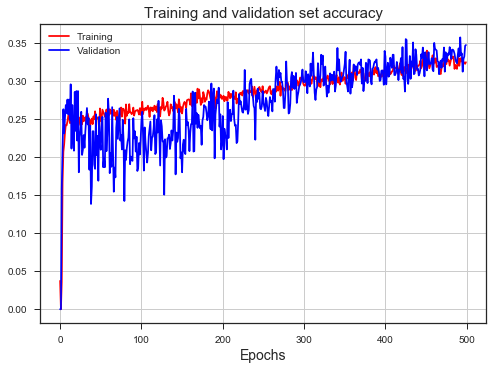

In [72]:
hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=500,plot_loss=True)

### Basic run of the neural network (using Stochastic Gradient Descent optimizer)

In [73]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.2,learning_rate=0.02,
                      neuron_layer_1=100,neuron_layer_2=50,optimizer='SGD')

Train on 8400 samples, validate on 1800 samples
Epoch 1/1000
8400/8400 [==============================] - 1s 89us/step - loss: 0.5120 - acc: 0.0288 - val_loss: 0.4294 - val_acc: 0.0000e+00
Epoch 2/1000
8400/8400 [==============================] - 0s 23us/step - loss: 0.3716 - acc: 1.1905e-04 - val_loss: 0.3501 - val_acc: 0.0000e+00
Epoch 3/1000
8400/8400 [==============================] - 0s 21us/step - loss: 0.2962 - acc: 0.0000e+00 - val_loss: 0.3024 - val_acc: 0.0000e+00
Epoch 4/1000
8400/8400 [==============================] - 0s 20us/step - loss: 0.2490 - acc: 0.0000e+00 - val_loss: 0.2622 - val_acc: 0.0000e+00
Epoch 5/1000
8400/8400 [==============================] - 0s 17us/step - loss: 0.1976 - acc: 0.0000e+00 - val_loss: 0.2223 - val_acc: 0.0000e+00
Epoch 6/1000
8400/8400 [==============================] - 0s 17us/step - loss: 0.1548 - acc: 0.0000e+00 - val_loss: 0.1794 - val_acc: 0.0000e+00
Epoch 7/1000
8400/8400 [==============================] - 0s 17us/step - loss: 0.1155 

Epoch 59/1000
8400/8400 [==============================] - 0s 17us/step - loss: -6.3231 - acc: 0.3532 - val_loss: -6.6123 - val_acc: 0.3756
Epoch 60/1000
8400/8400 [==============================] - 0s 17us/step - loss: -6.2912 - acc: 0.3495 - val_loss: -6.5991 - val_acc: 0.3806
Epoch 61/1000
8400/8400 [==============================] - 0s 17us/step - loss: -6.3440 - acc: 0.3574 - val_loss: -6.6501 - val_acc: 0.3817
Epoch 62/1000
8400/8400 [==============================] - 0s 17us/step - loss: -6.4224 - acc: 0.3600 - val_loss: -6.6049 - val_acc: 0.3744
Epoch 63/1000
8400/8400 [==============================] - 0s 17us/step - loss: -6.4097 - acc: 0.3598 - val_loss: -6.6340 - val_acc: 0.3811
Epoch 64/1000
8400/8400 [==============================] - 0s 17us/step - loss: -6.4095 - acc: 0.3568 - val_loss: -6.6717 - val_acc: 0.3800
Epoch 65/1000
8400/8400 [==============================] - 0s 18us/step - loss: -6.4431 - acc: 0.3644 - val_loss: -6.6811 - val_acc: 0.3822
Epoch 66/1000
8400/8

8400/8400 [==============================] - 0s 27us/step - loss: -6.9373 - acc: 0.4051 - val_loss: -6.9782 - val_acc: 0.4233
Epoch 176/1000
8400/8400 [==============================] - 0s 20us/step - loss: -6.9346 - acc: 0.4048 - val_loss: -6.9674 - val_acc: 0.4133
Epoch 177/1000
8400/8400 [==============================] - 0s 23us/step - loss: -6.9322 - acc: 0.4044 - val_loss: -7.0176 - val_acc: 0.4239
Epoch 178/1000
8400/8400 [==============================] - 0s 20us/step - loss: -6.9517 - acc: 0.4071 - val_loss: -6.9912 - val_acc: 0.4228
Epoch 179/1000
8400/8400 [==============================] - 0s 19us/step - loss: -6.9256 - acc: 0.4048 - val_loss: -7.0086 - val_acc: 0.4156
Epoch 180/1000
8400/8400 [==============================] - 0s 21us/step - loss: -6.9046 - acc: 0.4023 - val_loss: -7.0216 - val_acc: 0.4250
Epoch 181/1000
8400/8400 [==============================] - 0s 22us/step - loss: -6.9705 - acc: 0.4061 - val_loss: -7.0119 - val_acc: 0.4228
Epoch 182/1000
8400/8400 [==

8400/8400 [==============================] - 0s 17us/step - loss: -7.1044 - acc: 0.4194 - val_loss: -7.0949 - val_acc: 0.4311
Epoch 292/1000
8400/8400 [==============================] - 0s 17us/step - loss: -7.0981 - acc: 0.4169 - val_loss: -7.0565 - val_acc: 0.4383
Epoch 293/1000
8400/8400 [==============================] - 0s 17us/step - loss: -7.0987 - acc: 0.4164 - val_loss: -7.1067 - val_acc: 0.4433
Epoch 294/1000
8400/8400 [==============================] - 0s 17us/step - loss: -7.0802 - acc: 0.4156 - val_loss: -7.1311 - val_acc: 0.4478
Epoch 295/1000
8400/8400 [==============================] - 0s 17us/step - loss: -7.0604 - acc: 0.4177 - val_loss: -7.1044 - val_acc: 0.4283
Epoch 296/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.0662 - acc: 0.4175 - val_loss: -7.0905 - val_acc: 0.4261
Epoch 297/1000
8400/8400 [==============================] - 0s 17us/step - loss: -7.1324 - acc: 0.4182 - val_loss: -7.1242 - val_acc: 0.4367
Epoch 298/1000
8400/8400 [==

Epoch 349/1000
8400/8400 [==============================] - 0s 22us/step - loss: -7.0933 - acc: 0.4206 - val_loss: -7.1186 - val_acc: 0.4406
Epoch 350/1000
8400/8400 [==============================] - 0s 22us/step - loss: -7.1046 - acc: 0.4176 - val_loss: -7.0837 - val_acc: 0.4411
Epoch 351/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.1365 - acc: 0.4217 - val_loss: -7.0459 - val_acc: 0.4217
Epoch 352/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.1372 - acc: 0.4202 - val_loss: -7.0691 - val_acc: 0.4322
Epoch 353/1000
8400/8400 [==============================] - 0s 17us/step - loss: -7.1019 - acc: 0.4187 - val_loss: -7.0699 - val_acc: 0.4478
Epoch 354/1000
8400/8400 [==============================] - 0s 17us/step - loss: -7.1155 - acc: 0.4207 - val_loss: -7.0575 - val_acc: 0.4328
Epoch 355/1000
8400/8400 [==============================] - 0s 17us/step - loss: -7.0603 - acc: 0.4176 - val_loss: -7.0784 - val_acc: 0.4300
Epoch 356/100

8400/8400 [==============================] - 0s 34us/step - loss: -7.1451 - acc: 0.4224 - val_loss: -7.0499 - val_acc: 0.4294
Epoch 408/1000
8400/8400 [==============================] - 0s 36us/step - loss: -7.2141 - acc: 0.4260 - val_loss: -7.0761 - val_acc: 0.4306
Epoch 409/1000
8400/8400 [==============================] - 0s 33us/step - loss: -7.1272 - acc: 0.4207 - val_loss: -7.1251 - val_acc: 0.4406
Epoch 410/1000
8400/8400 [==============================] - 0s 25us/step - loss: -7.1336 - acc: 0.4199 - val_loss: -7.0638 - val_acc: 0.4422
Epoch 411/1000
8400/8400 [==============================] - 0s 36us/step - loss: -7.0969 - acc: 0.4213 - val_loss: -7.1137 - val_acc: 0.4472
Epoch 412/1000
8400/8400 [==============================] - 0s 31us/step - loss: -7.0916 - acc: 0.4213 - val_loss: -7.1103 - val_acc: 0.4400
Epoch 413/1000
8400/8400 [==============================] - 0s 24us/step - loss: -7.1156 - acc: 0.4224 - val_loss: -7.0985 - val_acc: 0.4406
Epoch 414/1000
8400/8400 [==

Epoch 465/1000
8400/8400 [==============================] - 0s 23us/step - loss: -7.1139 - acc: 0.4205 - val_loss: -7.1059 - val_acc: 0.4428
Epoch 466/1000
8400/8400 [==============================] - 0s 23us/step - loss: -7.1464 - acc: 0.4236 - val_loss: -7.0871 - val_acc: 0.4433
Epoch 467/1000
8400/8400 [==============================] - 0s 24us/step - loss: -7.0932 - acc: 0.4205 - val_loss: -7.0910 - val_acc: 0.4522
Epoch 468/1000
8400/8400 [==============================] - 0s 22us/step - loss: -7.1629 - acc: 0.4252 - val_loss: -7.1179 - val_acc: 0.4450
Epoch 469/1000
8400/8400 [==============================] - 0s 23us/step - loss: -7.1240 - acc: 0.4225 - val_loss: -7.1222 - val_acc: 0.4433
Epoch 470/1000
8400/8400 [==============================] - 0s 23us/step - loss: -7.1420 - acc: 0.4218 - val_loss: -7.1062 - val_acc: 0.4472
Epoch 471/1000
8400/8400 [==============================] - 0s 24us/step - loss: -7.1791 - acc: 0.4245 - val_loss: -7.1034 - val_acc: 0.4433
Epoch 472/100

8400/8400 [==============================] - 0s 23us/step - loss: -7.2038 - acc: 0.4268 - val_loss: -7.0898 - val_acc: 0.4483
Epoch 524/1000
8400/8400 [==============================] - 0s 23us/step - loss: -7.1211 - acc: 0.4231 - val_loss: -7.0460 - val_acc: 0.4417
Epoch 525/1000
8400/8400 [==============================] - 0s 21us/step - loss: -7.1914 - acc: 0.4276 - val_loss: -7.0762 - val_acc: 0.4394
Epoch 526/1000
8400/8400 [==============================] - 0s 26us/step - loss: -7.1852 - acc: 0.4260 - val_loss: -7.0635 - val_acc: 0.4378
Epoch 527/1000
8400/8400 [==============================] - 0s 41us/step - loss: -7.2191 - acc: 0.4270 - val_loss: -7.0947 - val_acc: 0.4456
Epoch 528/1000
8400/8400 [==============================] - 0s 31us/step - loss: -7.1969 - acc: 0.4262 - val_loss: -7.0690 - val_acc: 0.4394
Epoch 529/1000
8400/8400 [==============================] - 0s 31us/step - loss: -7.1898 - acc: 0.4274 - val_loss: -7.0224 - val_acc: 0.4433
Epoch 530/1000
8400/8400 [==

8400/8400 [==============================] - 0s 22us/step - loss: -7.2272 - acc: 0.4306 - val_loss: -7.1070 - val_acc: 0.4400
Epoch 640/1000
8400/8400 [==============================] - 0s 22us/step - loss: -7.2011 - acc: 0.4292 - val_loss: -7.1166 - val_acc: 0.4433
Epoch 641/1000
8400/8400 [==============================] - 0s 19us/step - loss: -7.2143 - acc: 0.4280 - val_loss: -7.0811 - val_acc: 0.4467
Epoch 642/1000
8400/8400 [==============================] - 0s 19us/step - loss: -7.2288 - acc: 0.4281 - val_loss: -7.1378 - val_acc: 0.4522
Epoch 643/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.1899 - acc: 0.4255 - val_loss: -7.1246 - val_acc: 0.4517
Epoch 644/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.2185 - acc: 0.4282 - val_loss: -7.1155 - val_acc: 0.4433
Epoch 645/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.2205 - acc: 0.4306 - val_loss: -7.1553 - val_acc: 0.4550
Epoch 646/1000
8400/8400 [==

Epoch 697/1000
8400/8400 [==============================] - 0s 19us/step - loss: -7.2107 - acc: 0.4295 - val_loss: -7.1206 - val_acc: 0.4456
Epoch 698/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.2808 - acc: 0.4326 - val_loss: -7.1121 - val_acc: 0.4428
Epoch 699/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.1843 - acc: 0.4282 - val_loss: -7.1064 - val_acc: 0.4400
Epoch 700/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.2099 - acc: 0.4268 - val_loss: -7.1182 - val_acc: 0.4450
Epoch 701/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.1856 - acc: 0.4264 - val_loss: -7.0931 - val_acc: 0.4478
Epoch 702/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.2544 - acc: 0.4314 - val_loss: -7.1011 - val_acc: 0.4394
Epoch 703/1000
8400/8400 [==============================] - 0s 19us/step - loss: -7.2405 - acc: 0.4301 - val_loss: -7.0906 - val_acc: 0.4406
Epoch 704/100

8400/8400 [==============================] - 0s 27us/step - loss: -7.2629 - acc: 0.4329 - val_loss: -7.1336 - val_acc: 0.4461
Epoch 756/1000
8400/8400 [==============================] - 0s 24us/step - loss: -7.2862 - acc: 0.4324 - val_loss: -7.0872 - val_acc: 0.4444
Epoch 757/1000
8400/8400 [==============================] - 0s 25us/step - loss: -7.2192 - acc: 0.4304 - val_loss: -7.1423 - val_acc: 0.4494
Epoch 758/1000
8400/8400 [==============================] - 0s 22us/step - loss: -7.2781 - acc: 0.4333 - val_loss: -7.0964 - val_acc: 0.4517
Epoch 759/1000
8400/8400 [==============================] - 0s 24us/step - loss: -7.2098 - acc: 0.4294 - val_loss: -7.0788 - val_acc: 0.4483
Epoch 760/1000
8400/8400 [==============================] - ETA: 0s - loss: -7.2179 - acc: 0.42 - 0s 23us/step - loss: -7.2235 - acc: 0.4295 - val_loss: -7.0798 - val_acc: 0.4478
Epoch 761/1000
8400/8400 [==============================] - 0s 25us/step - loss: -7.2199 - acc: 0.4285 - val_loss: -7.0914 - val_ac

Epoch 813/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.2711 - acc: 0.4321 - val_loss: -7.1061 - val_acc: 0.4461
Epoch 814/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.2483 - acc: 0.4310 - val_loss: -7.0968 - val_acc: 0.4500
Epoch 815/1000
8400/8400 [==============================] - 0s 19us/step - loss: -7.2758 - acc: 0.4346 - val_loss: -7.1348 - val_acc: 0.4472
Epoch 816/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.2403 - acc: 0.4307 - val_loss: -7.1400 - val_acc: 0.4472
Epoch 817/1000
8400/8400 [==============================] - 0s 19us/step - loss: -7.2570 - acc: 0.4335 - val_loss: -7.1302 - val_acc: 0.4472
Epoch 818/1000
8400/8400 [==============================] - 0s 18us/step - loss: -7.2515 - acc: 0.4288 - val_loss: -7.1488 - val_acc: 0.4533
Epoch 819/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.2329 - acc: 0.4286 - val_loss: -7.1318 - val_acc: 0.4378
Epoch 820/100

8400/8400 [==============================] - 0s 21us/step - loss: -7.2319 - acc: 0.4323 - val_loss: -7.1662 - val_acc: 0.4450
Epoch 872/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.3017 - acc: 0.4331 - val_loss: -7.1625 - val_acc: 0.4456
Epoch 873/1000
8400/8400 [==============================] - 0s 19us/step - loss: -7.2449 - acc: 0.4323 - val_loss: -7.1345 - val_acc: 0.4428
Epoch 874/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.2831 - acc: 0.4333 - val_loss: -7.1351 - val_acc: 0.4411
Epoch 875/1000
8400/8400 [==============================] - 0s 19us/step - loss: -7.2353 - acc: 0.4290 - val_loss: -7.1654 - val_acc: 0.4544
Epoch 876/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.3155 - acc: 0.4333 - val_loss: -7.1973 - val_acc: 0.4494
Epoch 877/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.2547 - acc: 0.4312 - val_loss: -7.1726 - val_acc: 0.4456
Epoch 878/1000
8400/8400 [==

8400/8400 [==============================] - 0s 24us/step - loss: -7.3020 - acc: 0.4345 - val_loss: -7.0793 - val_acc: 0.4417
Epoch 988/1000
8400/8400 [==============================] - 0s 24us/step - loss: -7.2295 - acc: 0.4282 - val_loss: -7.0946 - val_acc: 0.4450
Epoch 989/1000
8400/8400 [==============================] - 0s 24us/step - loss: -7.2692 - acc: 0.4326 - val_loss: -7.1207 - val_acc: 0.4561
Epoch 990/1000
8400/8400 [==============================] - 0s 22us/step - loss: -7.2654 - acc: 0.4349 - val_loss: -7.1176 - val_acc: 0.4433
Epoch 991/1000
8400/8400 [==============================] - 0s 20us/step - loss: -7.2173 - acc: 0.4270 - val_loss: -7.1079 - val_acc: 0.4478
Epoch 992/1000
8400/8400 [==============================] - 0s 22us/step - loss: -7.3341 - acc: 0.4329 - val_loss: -7.1226 - val_acc: 0.4556
Epoch 993/1000
8400/8400 [==============================] - 0s 28us/step - loss: -7.2484 - acc: 0.4326 - val_loss: -7.1171 - val_acc: 0.4556
Epoch 994/1000
8400/8400 [==

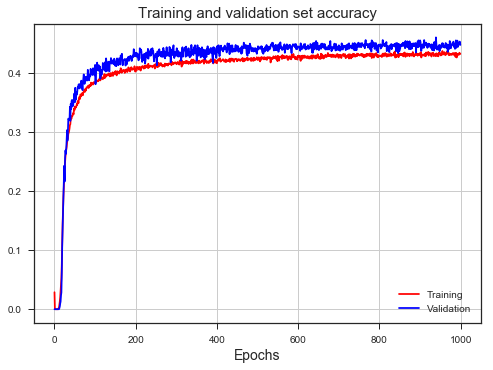

In [74]:
hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=1000,plot_loss=True)

### Varying hyperparameters

#### Number of neurons per layer

In [75]:
train_acc_n=[]
val_acc_n=[]

val_range=(10,200,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=0.02,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='SGD')
    hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=100,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 20
Done for number of neurons (each hidden layer): 30
Done for number of neurons (each hidden layer): 40
Done for number of neurons (each hidden layer): 50
Done for number of neurons (each hidden layer): 60
Done for number of neurons (each hidden layer): 70
Done for number of neurons (each hidden layer): 80
Done for number of neurons (each hidden layer): 90
Done for number of neurons (each hidden layer): 100
Done for number of neurons (each hidden layer): 110
Done for number of neurons (each hidden layer): 120
Done for number of neurons (each hidden layer): 130
Done for number of neurons (each hidden layer): 140
Done for number of neurons (each hidden layer): 150
Done for number of neurons (each hidden layer): 160
Done for number of neurons (each hidden layer): 170
Done for number of neurons (each hidden layer): 180
Done for number of neurons (each hidden layer): 190


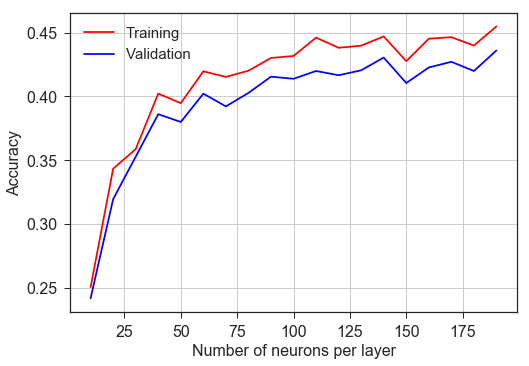

In [76]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.0,0.9)
plt.show()

#### Learning rate

In [77]:
import time
train_acc_lr=[]
val_acc_lr=[]

val_range=(-40,-10,1)
lr_range=[]
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    lr=10**(i/10.0)
    lr_range.append(lr)
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=lr,
                      neuron_layer_1=100,neuron_layer_2=100,optimizer='SGD')
    hist=run_NN(nn_model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=100,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_lr.append(acc_train)
    val_acc_lr.append(acc_val)
    t2=time.time()
    print(f"Done for learning rate: {lr}. Time took {round((t2-t1),2)} seconds")

Done for learning rate: 0.0001. Time took 25.83 seconds
Done for learning rate: 0.00012589254117941674. Time took 21.12 seconds
Done for learning rate: 0.00015848931924611142. Time took 22.15 seconds
Done for learning rate: 0.00019952623149688788. Time took 21.68 seconds
Done for learning rate: 0.00025118864315095795. Time took 20.6 seconds
Done for learning rate: 0.00031622776601683794. Time took 21.91 seconds
Done for learning rate: 0.00039810717055349735. Time took 26.95 seconds
Done for learning rate: 0.0005011872336272725. Time took 27.86 seconds
Done for learning rate: 0.000630957344480193. Time took 28.86 seconds
Done for learning rate: 0.0007943282347242813. Time took 28.35 seconds
Done for learning rate: 0.001. Time took 27.46 seconds
Done for learning rate: 0.0012589254117941675. Time took 28.69 seconds
Done for learning rate: 0.001584893192461114. Time took 27.08 seconds
Done for learning rate: 0.001995262314968879. Time took 26.53 seconds
Done for learning rate: 0.002511886

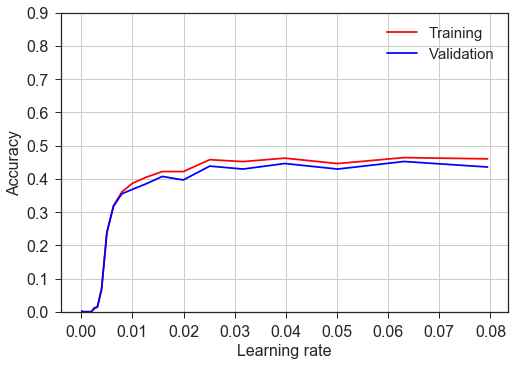

In [78]:
plt.plot(lr_range,train_acc_lr,c='red')
plt.plot(lr_range,val_acc_lr,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Learning rate", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.0,0.9)
plt.show()

### How to improve neural network performance?

In [79]:
model = Sequential()
model.add(Dense(100, input_shape=(input_dim,),activation='selu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='selu'))
model.add(Dropout(0.1))
model.add(Dense(50,activation='selu'))
model.add(Dropout(0.1))
# sigmoid activation for the last layer for classification
model.add(Dense(1, activation='sigmoid'))

#Optimizer
optimizer=keras.optimizers.Adam(lr=0.01)

model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 100)               1100      
_________________________________________________________________
dropout_103 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_155 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_104 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_156 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_105 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_157 (Dense)            (None, 1)                 51        
Total para

Train on 8400 samples, validate on 1800 samples
Epoch 1/100
8400/8400 [==============================] - 3s 338us/step - loss: -1.3126 - acc: 0.0868 - val_loss: -2.6945 - val_acc: 0.1306
Epoch 2/100
8400/8400 [==============================] - 0s 53us/step - loss: -3.6599 - acc: 0.1906 - val_loss: -4.3991 - val_acc: 0.2728
Epoch 3/100
8400/8400 [==============================] - 0s 52us/step - loss: -4.5293 - acc: 0.2593 - val_loss: -5.3267 - val_acc: 0.3267
Epoch 4/100
8400/8400 [==============================] - 0s 48us/step - loss: -5.0167 - acc: 0.2875 - val_loss: -5.7757 - val_acc: 0.3489
Epoch 5/100
8400/8400 [==============================] - 0s 44us/step - loss: -5.3383 - acc: 0.3113 - val_loss: -6.1191 - val_acc: 0.3783
Epoch 6/100
8400/8400 [==============================] - 0s 44us/step - loss: -5.5402 - acc: 0.3236 - val_loss: -5.9875 - val_acc: 0.3706
Epoch 7/100
8400/8400 [==============================] - 0s 47us/step - loss: -5.6309 - acc: 0.3331 - val_loss: -5.7436 - v

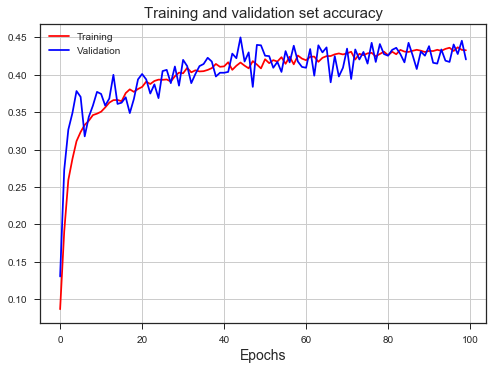

In [81]:
hist=run_NN(model,X_train_scaled,y_train,X_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=100,plot_loss=True)

### LEARNING CURVE: Varying training set size

In [82]:
import time
val_acc_train_size=[]
train_acc_train_size=[]

val_range=(10,101,5)
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    percentage=i*0.01
    # Sampling
    df_sampled = df.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('y',axis=1)
    y_train_sampled=df_sampled['y']
    X_train_sampled=StandardScaler().fit_transform(X_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.05,
                      neuron_layer_1=100,neuron_layer_2=100,optimizer='SGD')
    hist=run_NN(nn_model,X_train_sampled,y_train_sampled,X_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=100,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(X_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(X_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)
    
    t2=time.time()
    print(f"Done for: {i}% training set size. Took {round((t2-t1),2)} seconds.")

Done for: 10% training set size. Took 6.48 seconds.
Done for: 15% training set size. Took 7.5 seconds.
Done for: 20% training set size. Took 8.5 seconds.
Done for: 25% training set size. Took 9.81 seconds.
Done for: 30% training set size. Took 10.74 seconds.
Done for: 35% training set size. Took 12.03 seconds.
Done for: 40% training set size. Took 12.95 seconds.
Done for: 45% training set size. Took 13.86 seconds.
Done for: 50% training set size. Took 15.13 seconds.
Done for: 55% training set size. Took 16.53 seconds.
Done for: 60% training set size. Took 17.44 seconds.
Done for: 65% training set size. Took 18.83 seconds.
Done for: 70% training set size. Took 22.55 seconds.
Done for: 75% training set size. Took 22.54 seconds.
Done for: 80% training set size. Took 22.45 seconds.
Done for: 85% training set size. Took 23.57 seconds.
Done for: 90% training set size. Took 24.43 seconds.
Done for: 95% training set size. Took 26.7 seconds.
Done for: 100% training set size. Took 27.19 seconds.

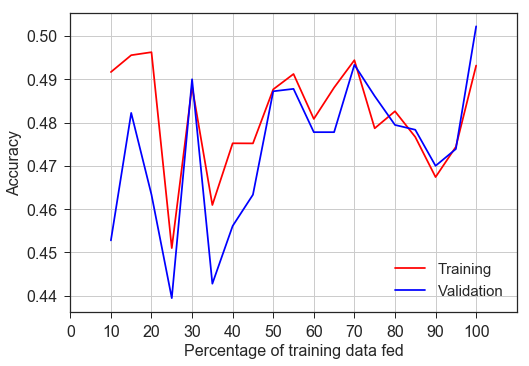

In [83]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.xlim(0,110)
plt.show()

## At the end, comparison of performance (accuracy) on test set and wall time

In [19]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=10)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
score_dt=accuracy_score(y_test,predictions)
print(score_dt)

0.7972222222222223
Wall time: 233 ms


In [20]:
%%time
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=2),
                            n_estimators=80,learning_rate=0.5)
adaboost.fit(X_train,y_train)
predictions = adaboost.predict(X_test)
score_adaboost=accuracy_score(y_test,predictions)
print(score_adaboost)

c:\users\tirtha\python\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9383333333333334
Wall time: 2.72 s


In [24]:
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)

In [25]:
%%time
from sklearn.svm import SVC
svc_clf=SVC(kernel="rbf", C=1,gamma=0.05)
svc_clf.fit(X_train_scaled,y_train)
predictions = svc_clf.predict(X_test_scaled)
score_SVC=accuracy_score(y_test,predictions)
print(score_SVC)

0.9733333333333334
Wall time: 2.27 s


In [26]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(5)
knn.fit(X_train_scaled,y_train)
predictions = knn.predict(X_test_scaled)
score_KNN=accuracy_score(y_test,predictions)
print(score_KNN)

0.69
Wall time: 667 ms


In [27]:
accuracy_scores = [0.79, 0.93, 0.97, 0.69, 0.45]
timing = [0.23, 2.72, 2.27, 0.667, 3.5]

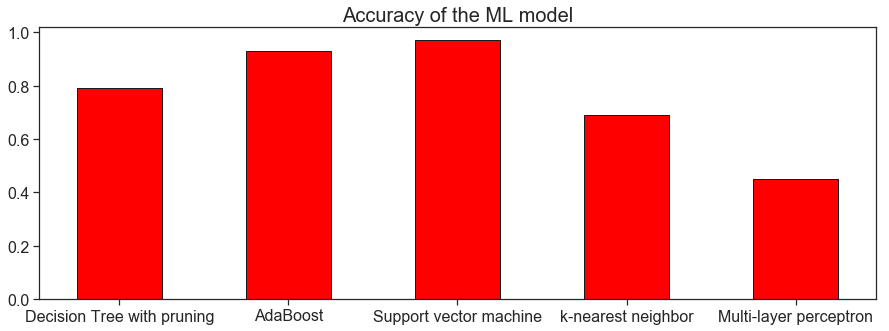

In [40]:
plt.figure(figsize=(15,5))
plt.title("Accuracy of the ML model",fontsize=20)
plt.bar(x=['Decision Tree with pruning','AdaBoost','Support vector machine','k-nearest neighbor','Multi-layer perceptron'],
        height=accuracy_scores,width=0.5,color='red',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

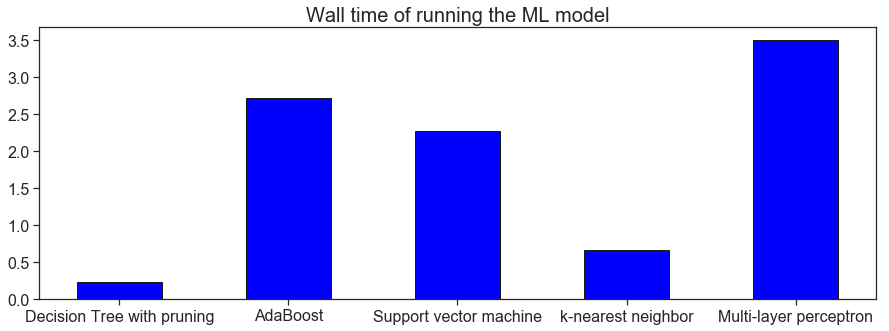

In [41]:
plt.figure(figsize=(15,5))
plt.title("Wall time of running the ML model",fontsize=20)
plt.bar(x=['Decision Tree with pruning','AdaBoost','Support vector machine','k-nearest neighbor','Multi-layer perceptron'],
        height=timing,width=0.5,color='blue',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()